<center>
    <h1 id='data-science-tricks-1' style='color:#7159c1'>🎩 Data Science Tricks 1 🎩</h1>
    <i>Getting better visualization insights and transformations of you dataset</i>
</center>

```txt
- Data Types Selection
- Distributions to Normal and Uniform Transformation
- Stratification
```

In [1]:
# ---- Imports ----
import matplotlib.pyplot as plt
import mplcyberpunk
import numpy as np
import pandas as pd

# ---- Constants ----
DATASETS_PATH = ('./datasets')
SEED = (20240707)

# ----- Settings ----
np.random.seed(SEED)
plt.style.use('cyberpunk')

<p id='0-data-types-selection' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>0 | Data Types Selection</p>

`Data Types Selection` is a way to separate categorical variables from numerical variables. There are two good ways to do it: 1. Manually separating the columns; 2. and using `df.select_dtypes` function. Let's see how to do it in both ways.

Documentation: [pandas.DataFrame.select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html).

In [2]:
# ---- Reading Dataset ----
loan_df = pd.read_csv(f'{DATASETS_PATH}/loan.csv')
# loan_df.info() # don't know the reason, but I think this function is so poluted. There's so much info and it gets me twisted
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [3]:
# ---- Selecting Data Types: List Comprehension Way ----
categorical_variables = [
    variable for variable in loan_df.columns
    if loan_df[variable].dtype in ['object', 'o', 'category']
]

numerical_variables = [
    variable for variable in loan_df.columns
    if loan_df[variable].dtype in ['float32', 'float64', 'int32', 'int64']
]

loan_categorical_df_1 = loan_df[categorical_variables].copy()
loan_numerical_df_1 = loan_df[numerical_variables].copy()

In [4]:
# ---- Selecting Data Types: select_dtypes Function ----
loan_categorical_df_2 = loan_df.select_dtypes(['object', 'category']).copy()
loan_numerical_df_2 = loan_df.select_dtypes(['number']).copy()

<p id='1-distributions-to-normal-uniform-transformation' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>1 | Distributions to Normal and Uniform Transformation</p>

`Quantile Transformer` is a sklearn preprocessing function that transforms any distribution to a Normal or a Uniform Distribution.

Documentation: [QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html).

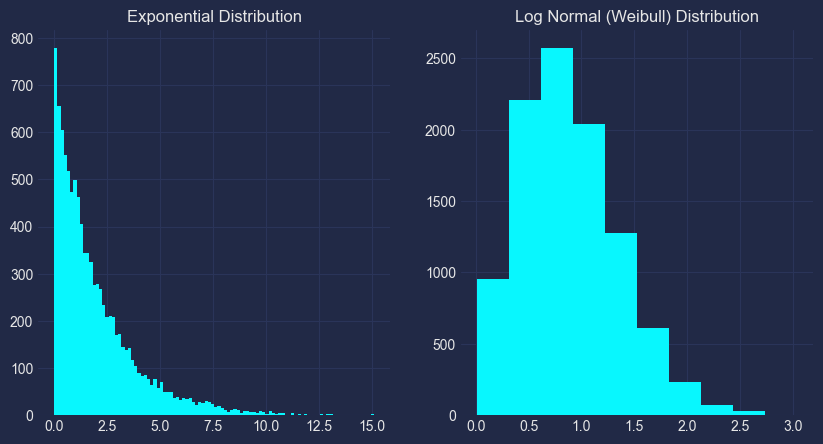

In [5]:
# ---- Creating Exponential and Log Normal Distributions ----
exponential_distribution = np.random.exponential(scale=2, size=(10_000, 1))
log_normal_distribution = np.random.weibull(a=2, size=(10_000, 1))

# ---- Plotting Distributions ----
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.hist(exponential_distribution, bins=100)
plt.title('Exponential Distribution')

plt.subplot(122)
plt.hist(log_normal_distribution)
plt.title('Log Normal (Weibull) Distribution')

plt.show()

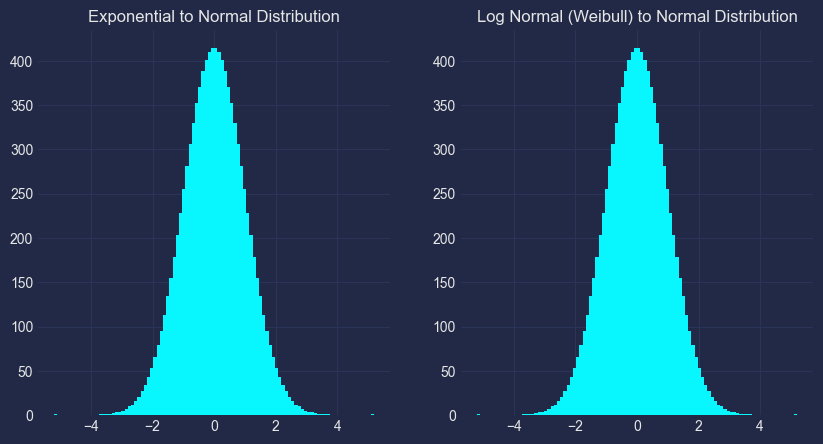

In [6]:
# ---- Transforming Distributions to Normal ----
from sklearn.preprocessing import QuantileTransformer
normal_distribution_transformer = QuantileTransformer(n_quantiles=10_000, output_distribution='normal', random_state=SEED)

exponential_to_normal_distribution = normal_distribution_transformer.fit_transform(exponential_distribution)
log_normal_to_normal_distribution = normal_distribution_transformer.fit_transform(log_normal_distribution)

# ---- Plotting Normal Transformed Distributions ----
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.hist(exponential_to_normal_distribution, bins=100)
plt.title('Exponential to Normal Distribution')

plt.subplot(122)
plt.hist(log_normal_to_normal_distribution, bins=100)
plt.title('Log Normal (Weibull) to Normal Distribution')

plt.show()

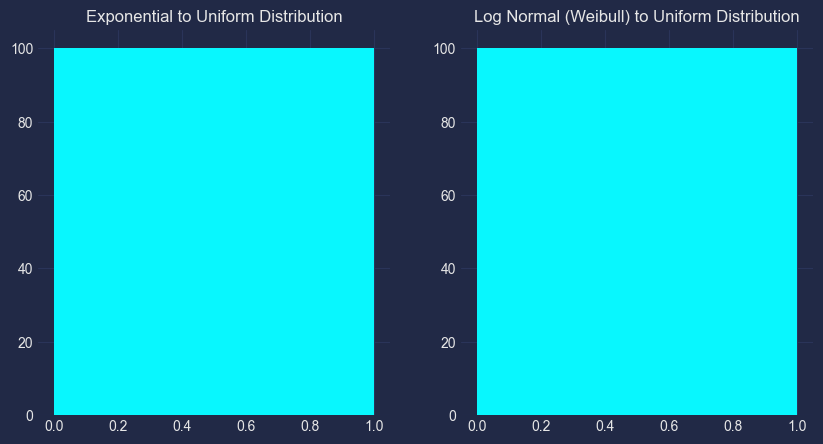

In [7]:
# ---- Transforming Distributions to Uniform ----
uniform_distribution_transformer = QuantileTransformer(n_quantiles=10_000, output_distribution='uniform', random_state=SEED)

exponential_to_uniform_distribution = uniform_distribution_transformer.fit_transform(exponential_distribution)
log_normal_to_uniform_distribution = uniform_distribution_transformer.fit_transform(log_normal_distribution)

# ---- Plotting Uniform Transformed Distributions ----
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.hist(exponential_to_uniform_distribution, bins=100)
plt.title('Exponential to Uniform Distribution')

plt.subplot(122)
plt.hist(log_normal_to_uniform_distribution, bins=100)
plt.title('Log Normal (Weibull) to Uniform Distribution')

plt.show()

<p id='2-stratification' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>2 | Stratification</p>

`train_test_split` is a great sklearn model selection function to split your dataset into training and testing/validation. However, when we are working on with Classification Problems, sometimes the dataset is unbalanced, that is, there are more outputs to class A than to class B.

When it happens, we have to split the dataset following the same proportion of the original dataset, else the model can be lead to bias, resulting to poor classifications.

Documentation: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [8]:
# ---- Reading Dataset ----
titanic_df = pd.read_csv(f'{DATASETS_PATH}/titanic.csv')

print(f'- Observations: {titanic_df.shape[0]:,}')
print(f'- Variables: {titanic_df.shape[1]:,}')
print('---')

titanic_df.head()

- Observations: 891
- Variables: 25
---


,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [9]:
# ---- Separating Variables to the Target One ----
X = titanic_df.drop('Survived', axis=1).copy() # axis '0': row way, '1': column way
y = titanic_df['Survived'].copy()

In [10]:
# ---- Splitting Dataset Without Stratification ----
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=SEED)

print(f'- Y Train Counts:\n{y_train.value_counts(normalize=True)}') # normalize 'True' returns the percentages, 'False' returns the frequencies
print('\n---\n')
print(f'- Y Valid Counts:\n{y_valid.value_counts(normalize=True)}')

- Y Train Counts:
0    0.618263
1    0.381737
Name: Survived, dtype: float64

---

- Y Valid Counts:
0    0.609865
1    0.390135
Name: Survived, dtype: float64


In [11]:
# ---- Splitting Dataset With Stratification ----
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, random_state=SEED)

print(f'- Y Train Counts:\n{y_train.value_counts(normalize=True)}') # normalize 'True' returns the percentages, 'False' returns the frequencies
print('\n---\n')
print(f'- Y Valid Counts:\n{y_valid.value_counts(normalize=True)}')

- Y Train Counts:
0    0.616766
1    0.383234
Name: Survived, dtype: float64

---

- Y Valid Counts:
0    0.61435
1    0.38565
Name: Survived, dtype: float64


<p id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</p>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).